# Scikit-learn ML 기본 동작

In [1]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### [1] 데이터 수집 & 준비

In [2]:
# 시간 : 점수
X = [2,4,6,8,10,12]
y = [40,50,60,70,80,90]

### [2] 데이터 분포 분석 => EDA => 시각화

In [3]:
# 탐색적 데이터 분석
# -> 시각화 시켜서 데이터의 정보가 어떻게 되는지 확인

Text(0, 0.5, 'Score')

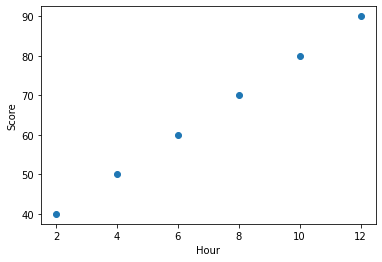

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('Hour')
plt.ylabel('Score')

In [5]:
# 선형/비선형
# 특성이 많을 것 같으면, 특성간의 선형관계를 파악해 봐야함
# -> 필요한 feature를 이런식으로 확인해서 뽑아내야겠지

# 이번의 경우, 'Hour와 Score는 선형관계에 있다'고 확인
# -> 선형의 데이터 분포

# 독립변수 : hour
# 종속변수 : score

# 시간(Hour)에 따라 점수(Score)를 예측하는 모델을 만들어 보자
# -> 지도학습() & 선형관계(확인했으니까) & 회귀모델(수치로 할테니)

In [6]:
# 사이킷 런에서 fit()쓸 때에는
# - x축에 들어가는게 2차원 형태가 들어가야 함
# - y축은 1차원이어도 무관

In [7]:
# 데이터를 준비할 때, 학습에 사용하기 위한 형태로 미리 만들어 둠
# 학습에 사용되는 형태로 데이터 변환

import pandas as pd

# df = pd.DataFrame([X,y])
df = pd.DataFrame({'Hour':X, 'Score':y})
print('shape : ', df.shape)

# X와 y가 같이 들어가야 DF가 만들어지니까
# 둘다 같은 결과겠지 당연?
# 현재 리스트안에 리스트가 들어간 것임

shape :  (6, 2)


In [8]:
import numpy as np

arrX = np.array(X)
arry = np.array(y)

print('arrX : ', arrX.shape, "\n"'arry : ', arry.shape)

arrX :  (6,) 
arry :  (6,)


In [9]:
# 1차원 -> 2차원
arrX = arrX.reshape(-1,1)
print('arrX : ', arrX.shape, "\n"'arry : ', arry.shape, arry.ndim)

arrX :  (6, 1) 
arry :  (6,) 1


### [3] 학습 방법 선택 및 모델 생성

- 데이터 + 라벨 -> 지도학습
- 선형 데이터 분포 -> 선형 모델 적용
- 시간에 따른 점수 예측 -> 회귀

#### [3-1] 모델 객체 생성

In [11]:
model = LinearRegression()

In [12]:
# 사이킷런 홈페이지
# - 지도 : 분류/회귀
# - 비지도 : 클러스터링(군집)
    
# 대부분 파라미터 자체는 건드릴 일이 없을 것임
# [ 모델 파라미터 ] : 학습한 후의 파라미터
# => 학습이 끝나고 찾아야 할 것은 모델 파라미터!!
# => _가 붙어 있는 것은 학습이 끝나고 난 후에 정해진 값

# coef_ : 기울기
# intercept_ : 절편

#### [3-2] 훈련(학습)

In [13]:
# train 데이터로 해야함 (현재는 data가 별로 없기 때문에 다 넣음)
model.fit(arrX, arry)

LinearRegression()

In [14]:
# 모델 파라미터 출력 => w 가중치, b 절편
print(model.coef_, model.intercept_)

# 이번 경우는, 
# 변수 1개라서 coef_가 1개나올 것이고
# 다중이라면 변수 개수만큼 coef_가 나올 것임

[5.] 30.0


In [15]:
# 회귀직선을 그어서 산점도와 얼마나 일치를 하는지 확인

### [4] 모델 평가

In [16]:
# score()
# - 분류 : 정답과 예측값이 맞는 정도 (맞춘 정도) (like 정답과 내가 푼 것이 맞는지 확인)
#   -> 정확도(accuracy)

# - 회귀 : 정답과 예측답 사이의 차이 정도 (차이 오차(Error))
#   -> 손실함수(Loss/Cost Fuction) : MSE(제곱), MAE(절대값), RMSE => 오차니까 낮을 수록 좋은 것이지
#   -> R2 계수 : 범위(0 ~ 1), 높을 수록 좋음

# cf)
# 사이킷런 site
# API -> sklearn.metrics : Metrics => 우측 regression에서 보면 mean_squared_error 등 확인해서 뽑아서 쓰면 됨

#### 평가( score() )

In [17]:
# 이번 경우는, 정확도와 R2계수 활용
# - 테스트(검증) 데이터로 평가
# - 사이킷런은 [ 객체명.score() ] 로 하면 되고

# 회귀 => 결정계수 R^2 반환
print('정확도(accuracy) : ', model.score(arrX, arry))

정확도(accuracy) :  1.0


#### 오차확인 ( MAE, MSE )

In [19]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측값 추출 (for 오차확인)
prey = model.predict(arrX)

mae = mean_absolute_error(arrX, prey)    
mse = mean_squared_error(arrX, prey)

print(prey, mae, mse)

[40. 50. 60. 70. 80. 90.] 58.0 3550.6666666666665
